In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('data/train/X_Train_Data_Input.csv')
Y_train = pd.read_csv('data/train/Y_Train_Data_Target.csv')

X_test = pd.read_csv('data/test/X_Test_Data_Input.csv')
Y_test = pd.read_csv('data/test/Y_Test_Data_Target.csv')

In [3]:
x_train = X_train.iloc[:,1:]
y_train = Y_train.iloc[:,1:]


x_test = X_test.iloc[:,1:]
y_test = Y_test.iloc[:,1:]
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)


(785133, 1)
(785133, 22)
(261712, 1)
(261712, 22)


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#performing eda on both the datasets
x_train.describe()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   785124 non-null  float64
 1   Column1   785133 non-null  int64  
 2   Column2   785133 non-null  float64
 3   Column3   658830 non-null  float64
 4   Column4   657423 non-null  float64
 5   Column5   617953 non-null  float64
 6   Column6   781283 non-null  float64
 7   Column7   785133 non-null  float64
 8   Column8   781283 non-null  float64
 9   Column9   52996 non-null   float64
 10  Column10  785133 non-null  int64  
 11  Column11  785133 non-null  int64  
 12  Column12  785133 non-null  int64  
 13  Column13  785133 non-null  int64  
 14  Column14  419430 non-null  float64
 15  Column15  768677 non-null  float64
 16  Column16  785133 non-null  float64
 17  Column17  785133 non-null  int64  
 18  Column18  785133 non-null  float64
 19  Column19  785133 non-null  int64  
 20  Colu

In [6]:
x_test.describe()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   261710 non-null  float64
 1   Column1   261712 non-null  int64  
 2   Column2   261712 non-null  float64
 3   Column3   219478 non-null  float64
 4   Column4   219002 non-null  float64
 5   Column5   206053 non-null  float64
 6   Column6   260478 non-null  float64
 7   Column7   261712 non-null  float64
 8   Column8   260478 non-null  float64
 9   Column9   17859 non-null   float64
 10  Column10  261712 non-null  int64  
 11  Column11  261712 non-null  int64  
 12  Column12  261712 non-null  int64  
 13  Column13  261712 non-null  int64  
 14  Column14  140033 non-null  float64
 15  Column15  256227 non-null  float64
 16  Column16  261712 non-null  float64
 17  Column17  261712 non-null  int64  
 18  Column18  261712 non-null  float64
 19  Column19  261712 non-null  int64  
 20  Colu

In [10]:
total = x_train.isnull().sum().sort_values(ascending=False)

percent = (x_train.isnull().sum()/x_train.isnull().count()).sort_values(ascending=False)

train_null_percent_table = pd.concat([total,percent],axis=1,keys=['Total','Percent'])

train_null_percent_table

,Total,Percent
Column0,0,0.0
Column1,0,0.0
Column2,0,0.0
Column3,0,0.0
Column4,0,0.0
Column5,0,0.0
Column6,0,0.0
Column7,0,0.0
Column8,0,0.0
Column9,0,0.0


In [11]:
total = x_test.isnull().sum().sort_values(ascending=False)

percent = (x_test.isnull().sum()/x_test.isnull().count()).sort_values(ascending=False)

test_null_percent_table = pd.concat([total,percent],axis=1,keys=['Total','Percent'])

test_null_percent_table

,Total,Percent
Column0,0,0.0
Column1,0,0.0
Column2,0,0.0
Column3,0,0.0
Column4,0,0.0
Column5,0,0.0
Column6,0,0.0
Column7,0,0.0
Column8,0,0.0
Column9,0,0.0


In [9]:
#cleanign null values using lightgbm
from algorithm_scripts.null_imputation import lightgbm_impute
x_train = lightgbm_impute(x_train)
x_test = lightgbm_impute(x_test)

array([[<Axes: title={'center': 'Column0'}>,
        <Axes: title={'center': 'Column1'}>,
        <Axes: title={'center': 'Column2'}>,
        <Axes: title={'center': 'Column3'}>,
        <Axes: title={'center': 'Column4'}>],
       [<Axes: title={'center': 'Column5'}>,
        <Axes: title={'center': 'Column6'}>,
        <Axes: title={'center': 'Column7'}>,
        <Axes: title={'center': 'Column8'}>,
        <Axes: title={'center': 'Column9'}>],
       [<Axes: title={'center': 'Column10'}>,
        <Axes: title={'center': 'Column11'}>,
        <Axes: title={'center': 'Column12'}>,
        <Axes: title={'center': 'Column13'}>,
        <Axes: title={'center': 'Column14'}>],
       [<Axes: title={'center': 'Column15'}>,
        <Axes: title={'center': 'Column16'}>,
        <Axes: title={'center': 'Column17'}>,
        <Axes: title={'center': 'Column18'}>,
        <Axes: title={'center': 'Column19'}>],
       [<Axes: title={'center': 'Column20'}>,
        <Axes: title={'center': 'Column2

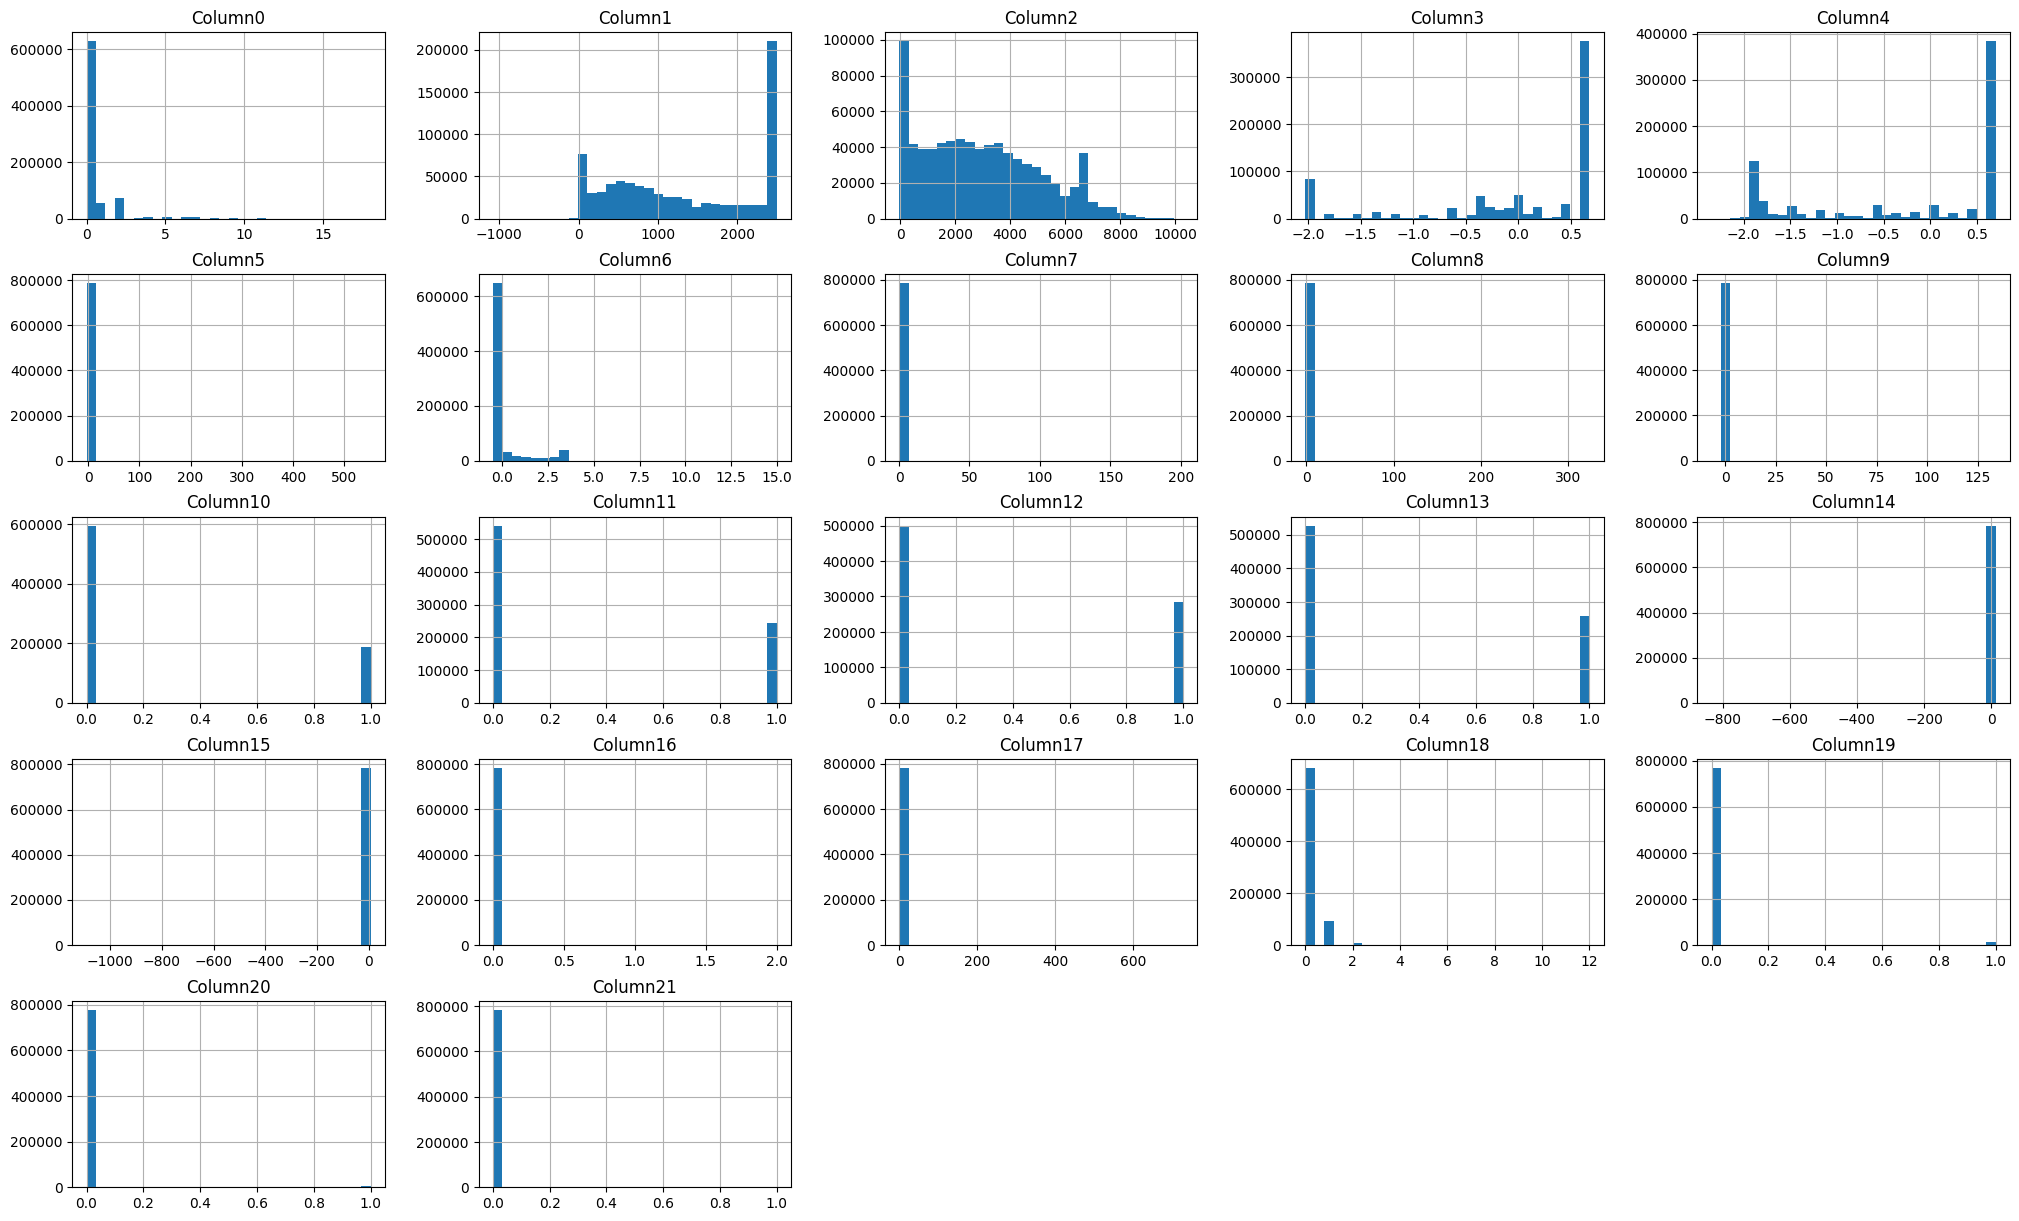

In [12]:
#analyzing or visualizing feature distribution
x_train.hist(bins=30,figsize=(25,15))

array([[<Axes: title={'center': 'Column0'}>,
        <Axes: title={'center': 'Column1'}>,
        <Axes: title={'center': 'Column2'}>,
        <Axes: title={'center': 'Column3'}>,
        <Axes: title={'center': 'Column4'}>],
       [<Axes: title={'center': 'Column5'}>,
        <Axes: title={'center': 'Column6'}>,
        <Axes: title={'center': 'Column7'}>,
        <Axes: title={'center': 'Column8'}>,
        <Axes: title={'center': 'Column9'}>],
       [<Axes: title={'center': 'Column10'}>,
        <Axes: title={'center': 'Column11'}>,
        <Axes: title={'center': 'Column12'}>,
        <Axes: title={'center': 'Column13'}>,
        <Axes: title={'center': 'Column14'}>],
       [<Axes: title={'center': 'Column15'}>,
        <Axes: title={'center': 'Column16'}>,
        <Axes: title={'center': 'Column17'}>,
        <Axes: title={'center': 'Column18'}>,
        <Axes: title={'center': 'Column19'}>],
       [<Axes: title={'center': 'Column20'}>,
        <Axes: title={'center': 'Column2

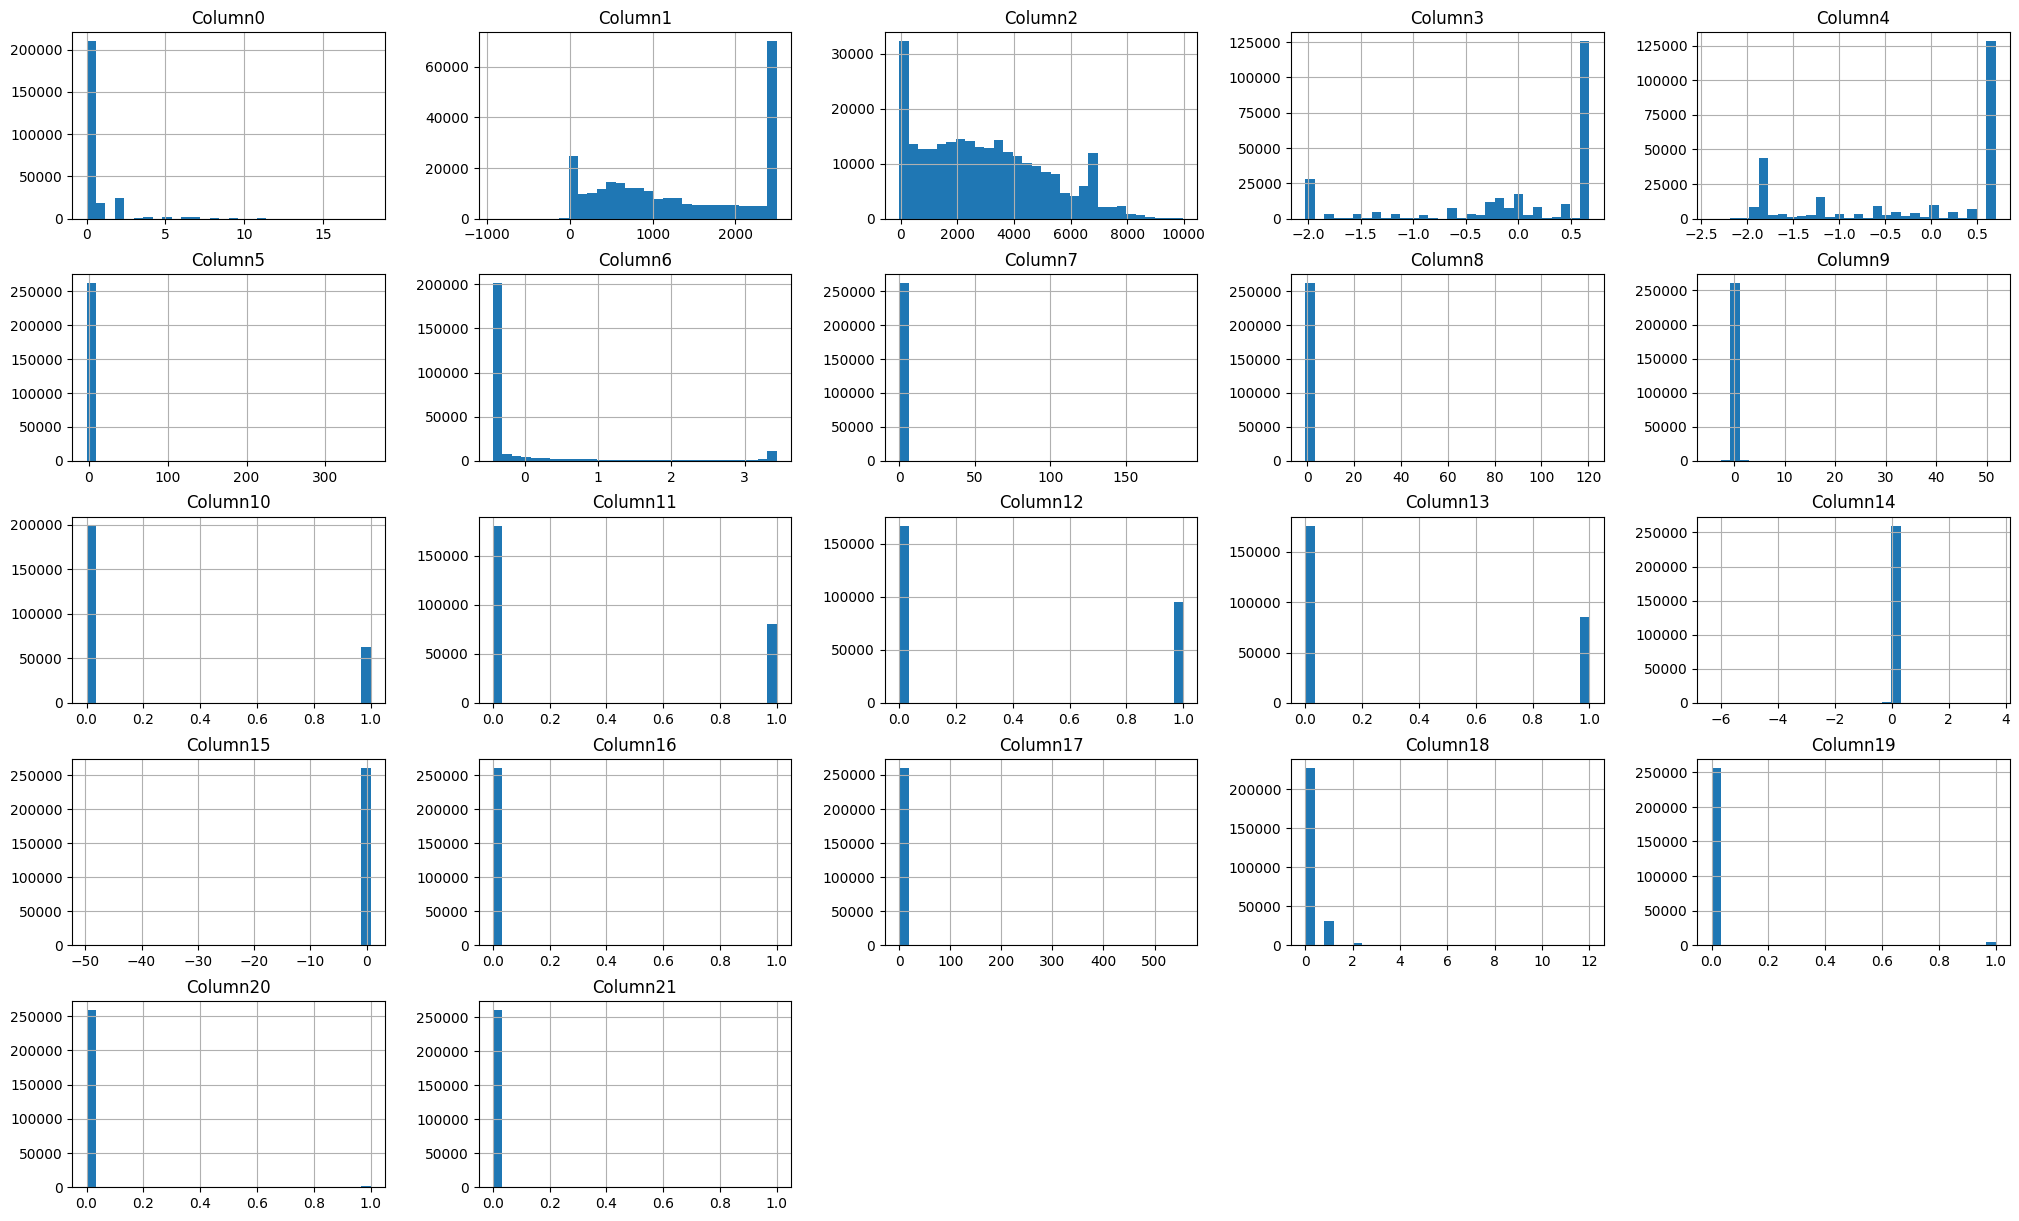

In [13]:
#analyzing or visualizing feature distribution
x_test.hist(bins=30,figsize=(25,15))

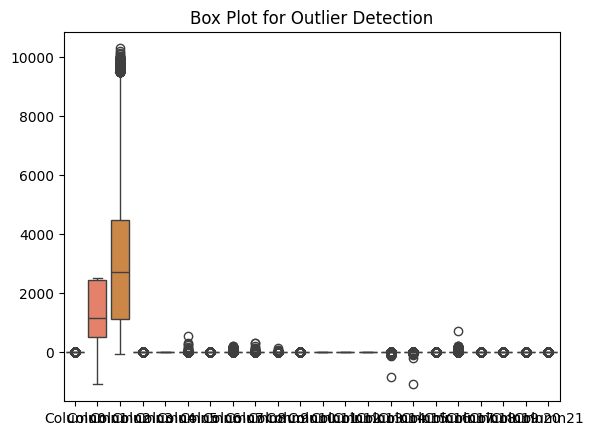

In [14]:
sns.boxplot(data=x_train)
plt.title('Box Plot for Outlier Detection')
plt.show()

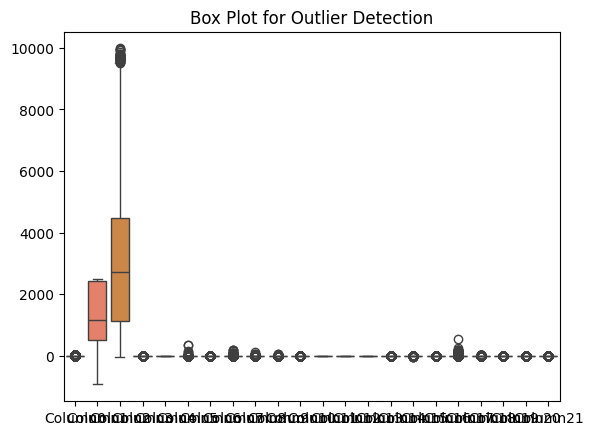

In [15]:
sns.boxplot(data=x_test)
plt.title('Box Plot for Outlier Detection')
plt.show()

In [20]:
#checkig the outliers
from algorithm_scripts.outlier_detection import IQR

outliers = IQR(x_train)
outliers.sum()

Column0     155575
Column1          0
Column2          0
Column3          0
Column4          0
Column5          0
Column6          0
Column7          0
Column8          0
Column9          0
Column10    188883
Column11         0
Column12         0
Column13         0
Column14         0
Column15         0
Column16       943
Column17     18436
Column18    102407
Column19     14728
Column20      7342
Column21      2165
dtype: int64

In [21]:
#checkig the outliers
from algorithm_scripts.outlier_detection import IQR

outliers = IQR(x_test)
outliers.sum()

Column0     51658
Column1         0
Column2         0
Column3         0
Column4         0
Column5         0
Column6         0
Column7         0
Column8         0
Column9         0
Column10    62804
Column11        0
Column12        0
Column13        0
Column14        0
Column15        0
Column16      306
Column17     6111
Column18    34229
Column19     4861
Column20     2521
Column21      709
dtype: int64

In [18]:
#treating outliers using iqr method

from algorithm_scripts.outlier_detection import iqrImpute
x_train = iqrImpute(x_train)


In [19]:
from algorithm_scripts.outlier_detection import iqrImpute
x_test = iqrImpute(x_test)

<Axes: >

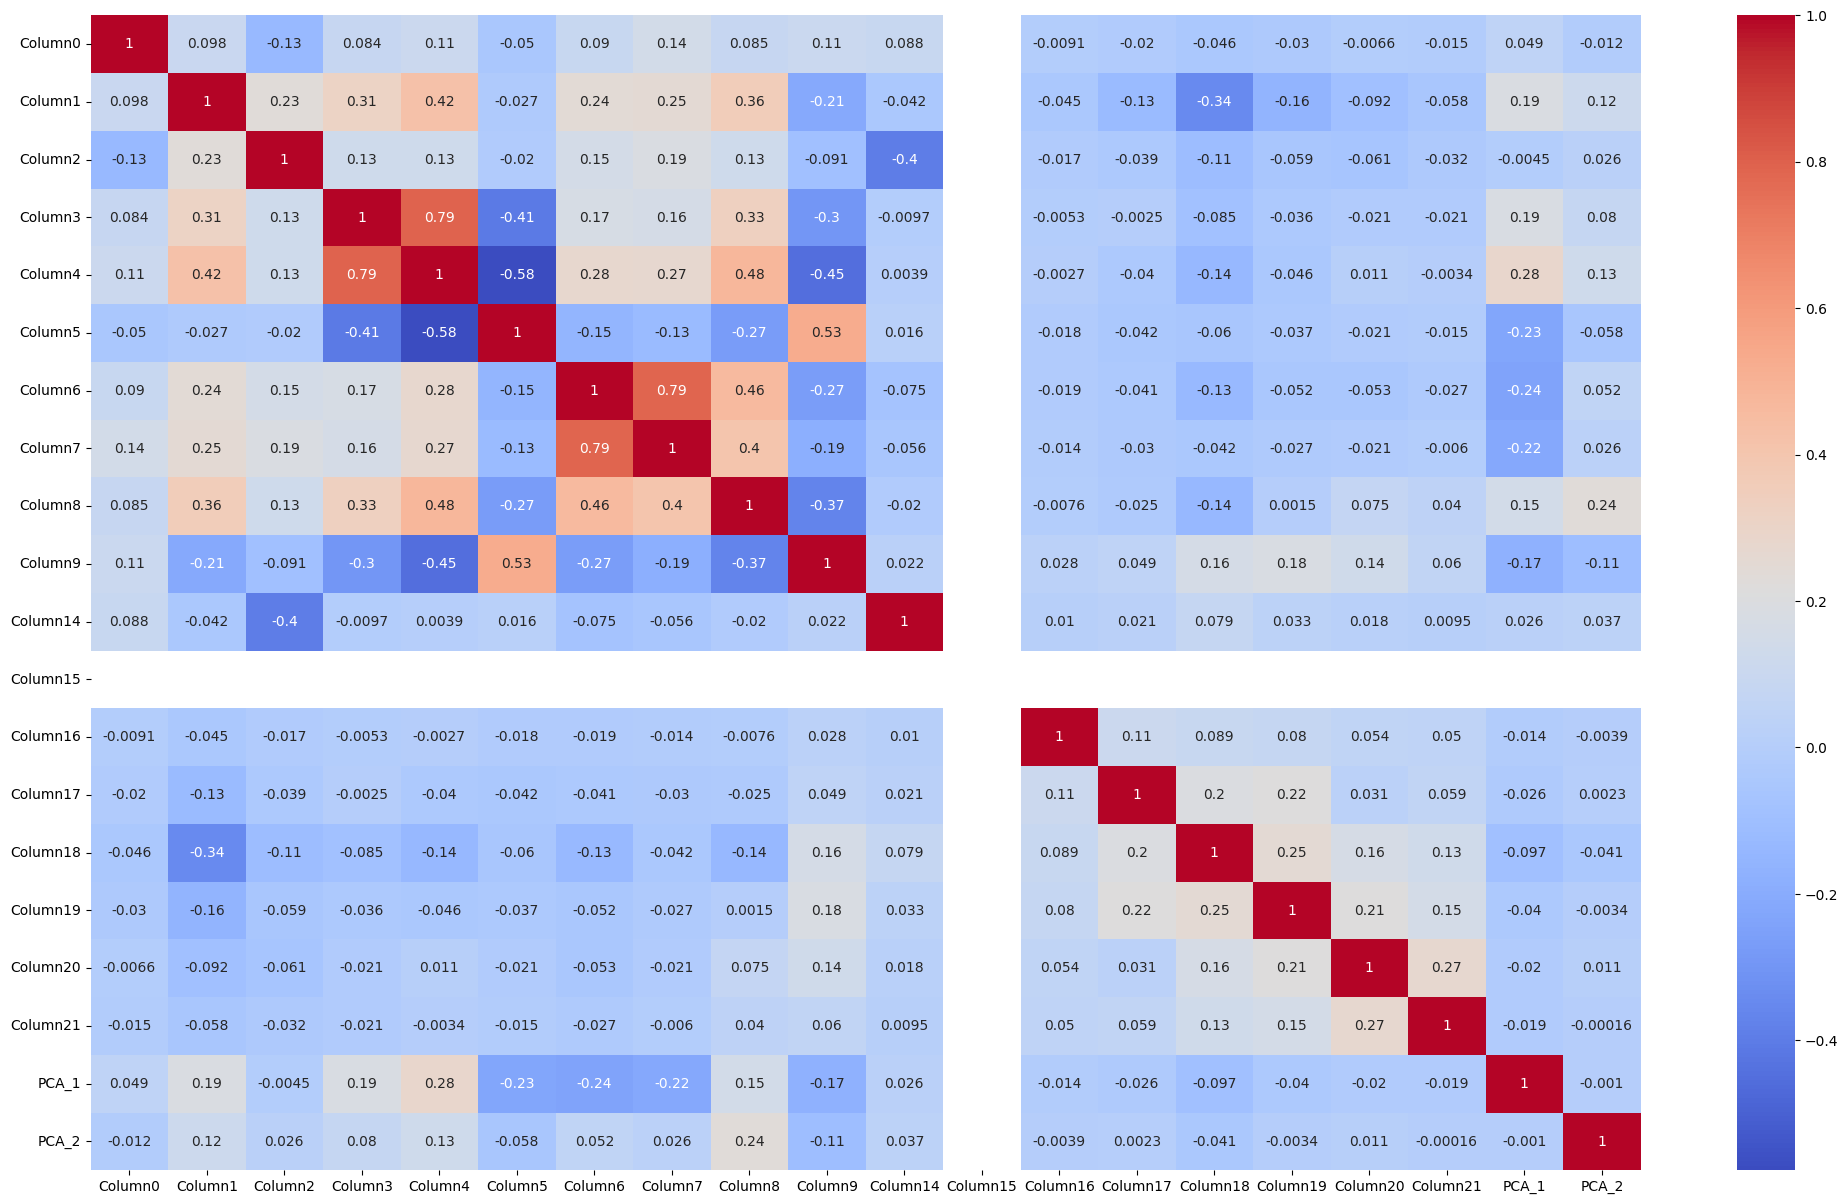

In [32]:
#doing correlation analysis 
corr_marix = x_train.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_marix,annot=True,cmap='coolwarm')

<Axes: >

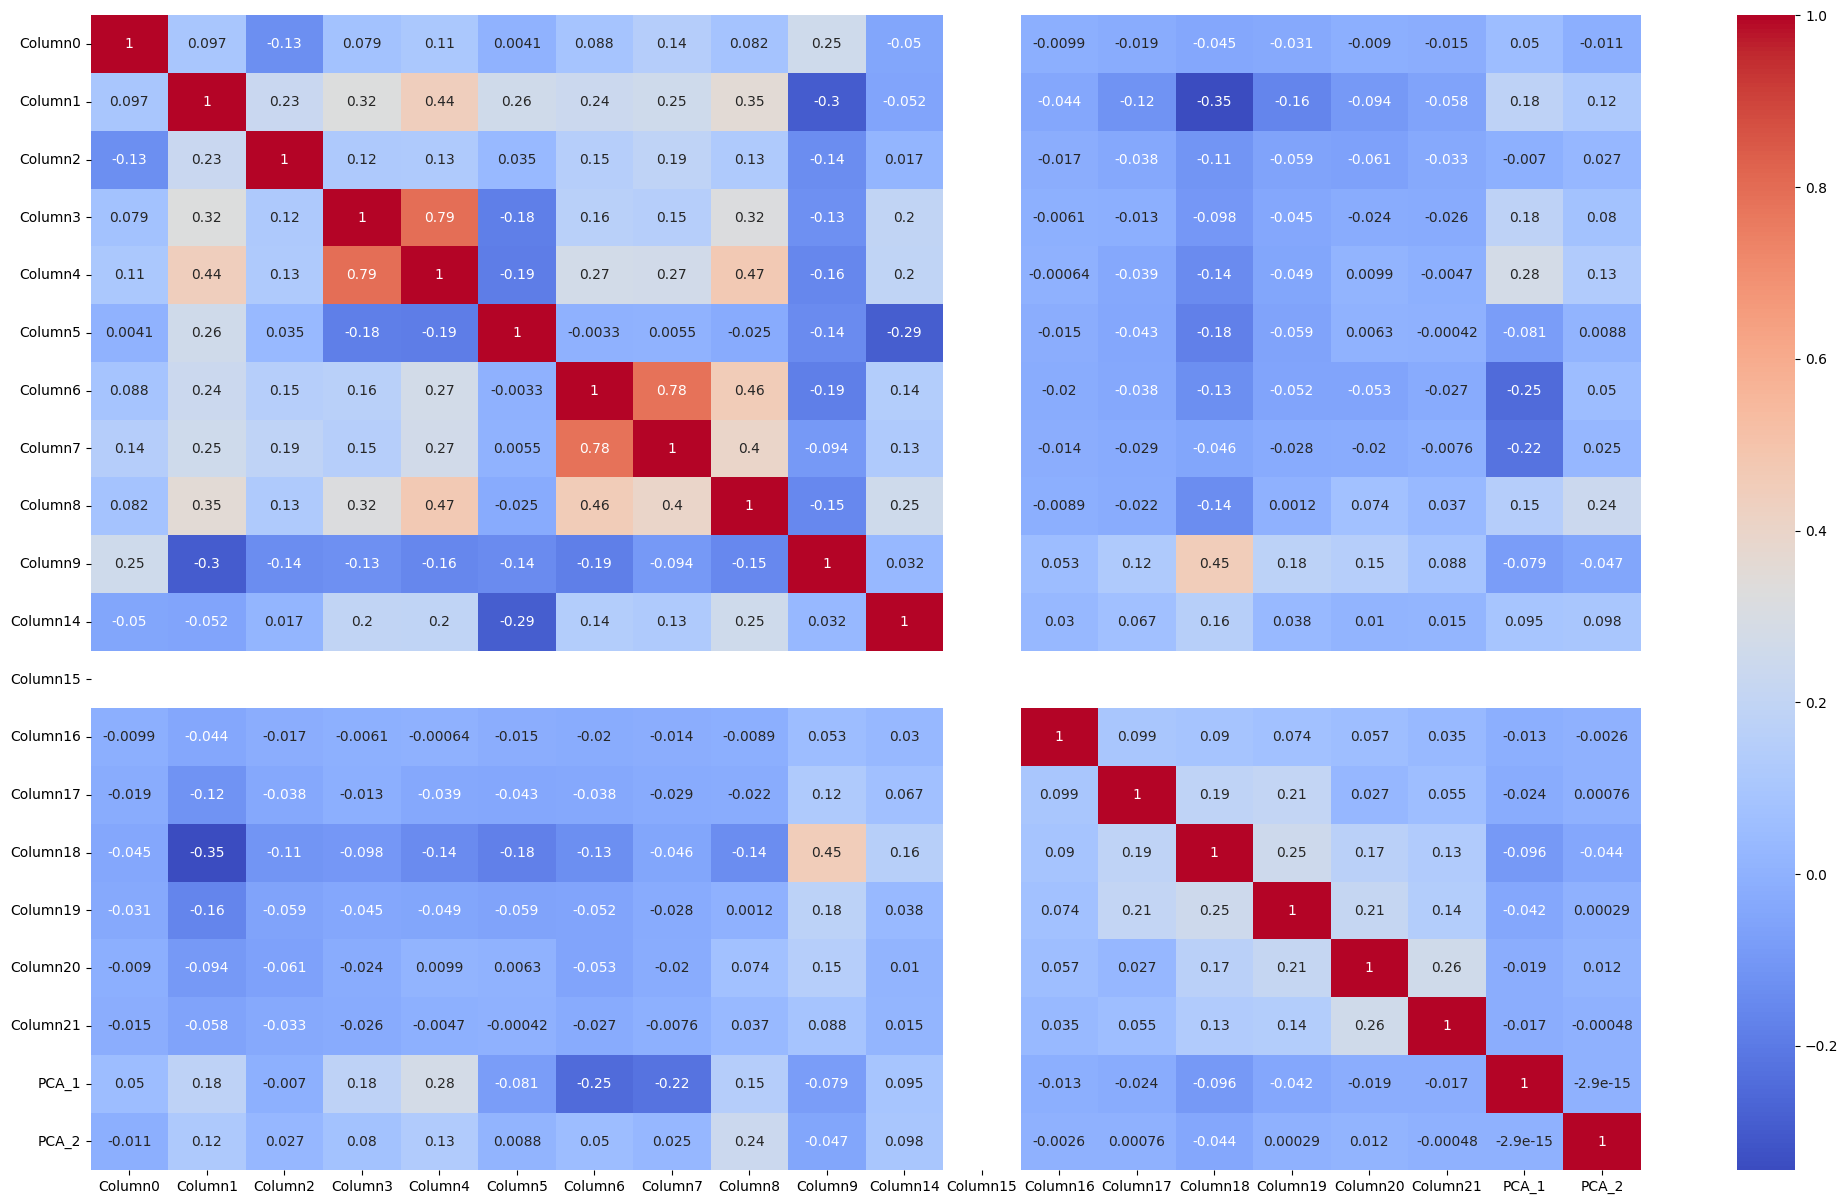

In [33]:

corr_marix = x_test.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_marix,annot=True,cmap='coolwarm')

In [24]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(data_scaled,columns=x_train.columns)
x_train.head()
x_train.shape

(785133, 22)

In [25]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(data_scaled,columns=x_train.columns)
x_test.head()
x_test.shape

(261712, 22)

In [26]:
#Performig pca on correlated columns
correlated_cols_train = x_train[['Column10','Column11','Column12','Column13']]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
uncor_cols_train = pca.fit_transform(correlated_cols_train)

variance = pca.explained_variance_ratio_
variance

uncor_cols_train = pd.DataFrame(uncor_cols_train,columns=['PCA_1','PCA_2'])
x_train = x_train.drop(correlated_cols_train,axis=1)

In [27]:
x_train.shape

(785133, 18)

In [28]:
#Performig pca on correlated columns
correlated_cols_test = x_test[['Column10','Column11','Column12','Column13']]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
uncor_cols_test = pca.fit_transform(correlated_cols_test)

variance = pca.explained_variance_ratio_
variance

uncor_cols_test = pd.DataFrame(uncor_cols_test,columns=['PCA_1','PCA_2'])
x_test = x_test.drop(correlated_cols_test,axis=1)

In [29]:
x_test.shape

(261712, 18)

In [30]:
x_train.head()
x_train = pd.concat([x_train,uncor_cols_train],axis=1)
x_train.head()
x_train.shape

(785133, 20)

In [31]:
x_test.head()
x_test = pd.concat([x_test,uncor_cols_test],axis=1)
x_test.head()
x_test.shape

(261712, 20)

In [34]:
x_train.isnull().sum()

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
PCA_1       0
PCA_2       0
dtype: int64

In [35]:
# #now checking for balancing or imbalancinfg the dataset
class_distribution = y_train.value_counts()
print(class_distribution)
from algorithm_scripts.balancing_dataset import smote

balanced_data = smote(x_train,y_train)
x_train = balanced_data[0]
y_train = balanced_data[1]
class_distribution = y_train.value_counts()
print(class_distribution)

target
0         711100
1          74033
Name: count, dtype: int64
target
0         711100
1         711100
Name: count, dtype: int64


In [36]:
print(x_train.shape)
print(y_train.shape)

(1422200, 20)
(1422200, 1)


In [41]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [42]:
#performing cross validation
kfold = KFold(n_splits=8,shuffle=True,random_state=42)
results = cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')

In [44]:

print(f"Cross-Validation Accuracy Scores: {results}")
print(f"Mean CV Accuracy: {results.mean()}")

Cross-Validation Accuracy Scores: [0.9810997  0.98117283 0.98131908 0.98079595 0.98128533 0.98135283
 0.98165659 0.98144284]
Mean CV Accuracy: 0.9812656447756996


In [45]:
#Now trainig the model with training dataset
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [46]:
#  metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [48]:
# evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.97
Precision: 0.75
Recall: 1.00
F1-Score: 0.85
ROC AUC Score: 0.98
Confusion Matrix:
[[228625   8409]
 [    95  24583]]


<Axes: >

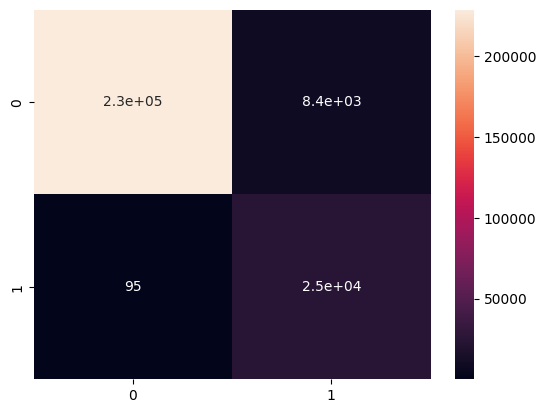

In [51]:
#plotting confusion matrix
sns.heatmap(conf_matrix,annot=True)